In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore');
df=pd.read_csv("./dataset/Real_Estate.csv")

In [5]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [7]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [9]:
num_cols=df.select_dtypes(include=['float','int'])
num_cols=num_cols.columns

#### Histogram to see the overall distribution of the data

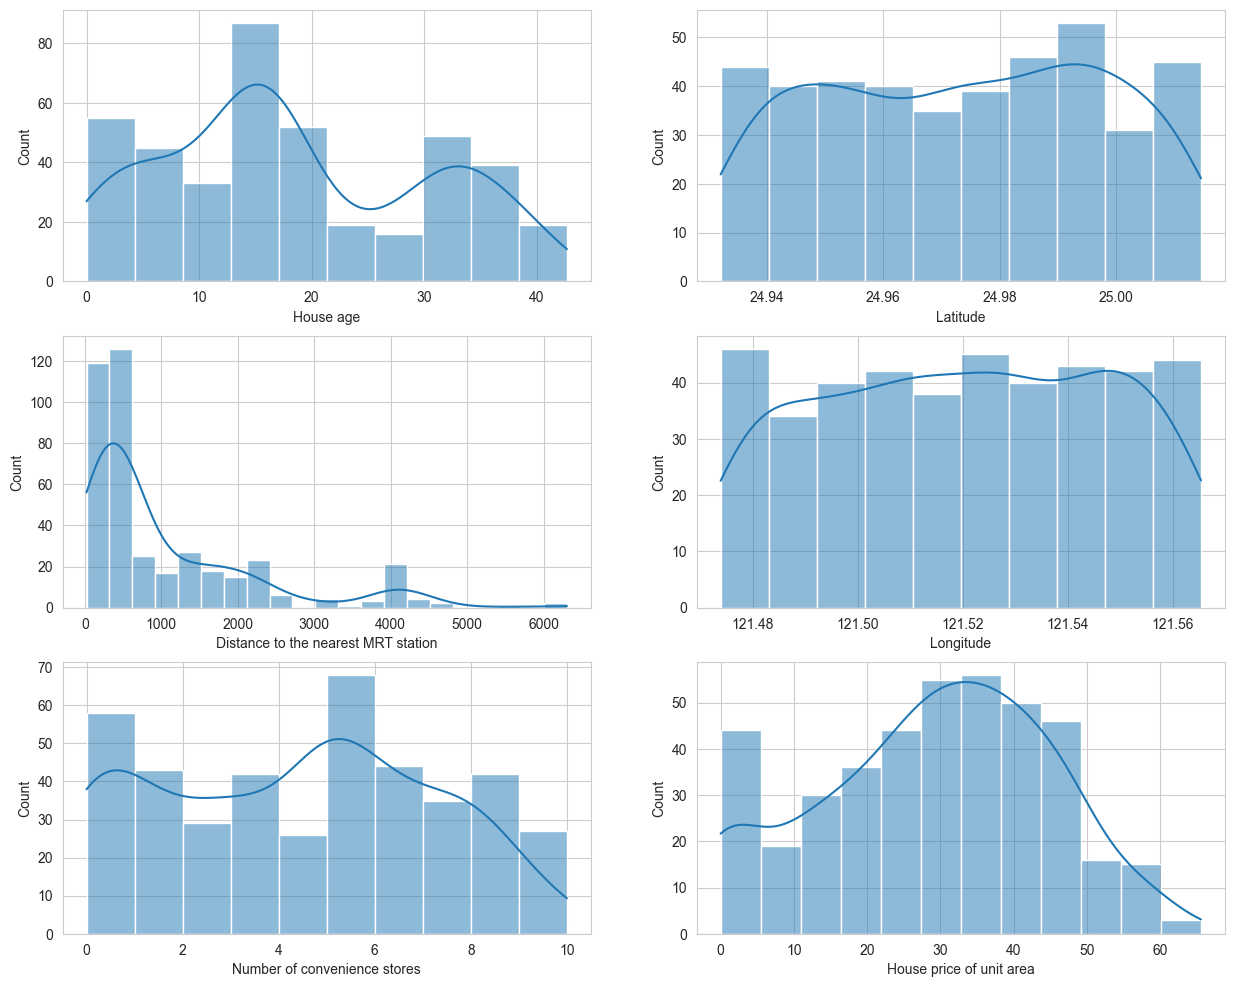

In [16]:
sns.set_style("whitegrid")
fig,axs=plt.subplots(3,2,figsize=(15,12))
for i,j in enumerate(num_cols):
    row=i%3
    col=i//3
    sns.histplot(df,x=j,kde=True,ax=axs[row,col])

#### Detect the outliers

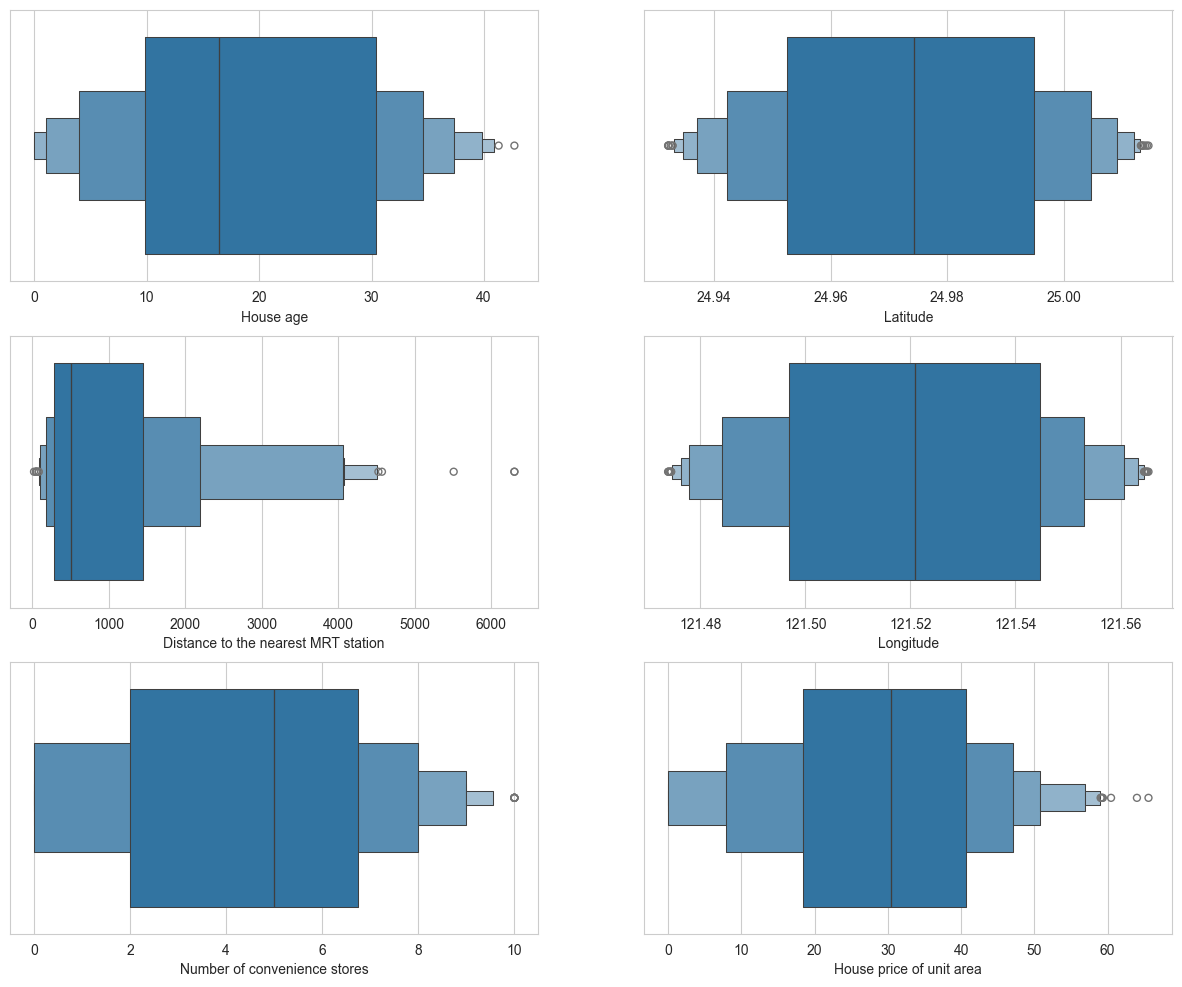

In [51]:
sns.set_style("whitegrid")
fig,axs=plt.subplots(3,2,figsize=(15,12))
for i,j in enumerate(num_cols):
    row=i%3
    col=i//3
    sns.boxenplot(df,x=j,ax=axs[row,col])

#### Scatter plot to see the relation of the features

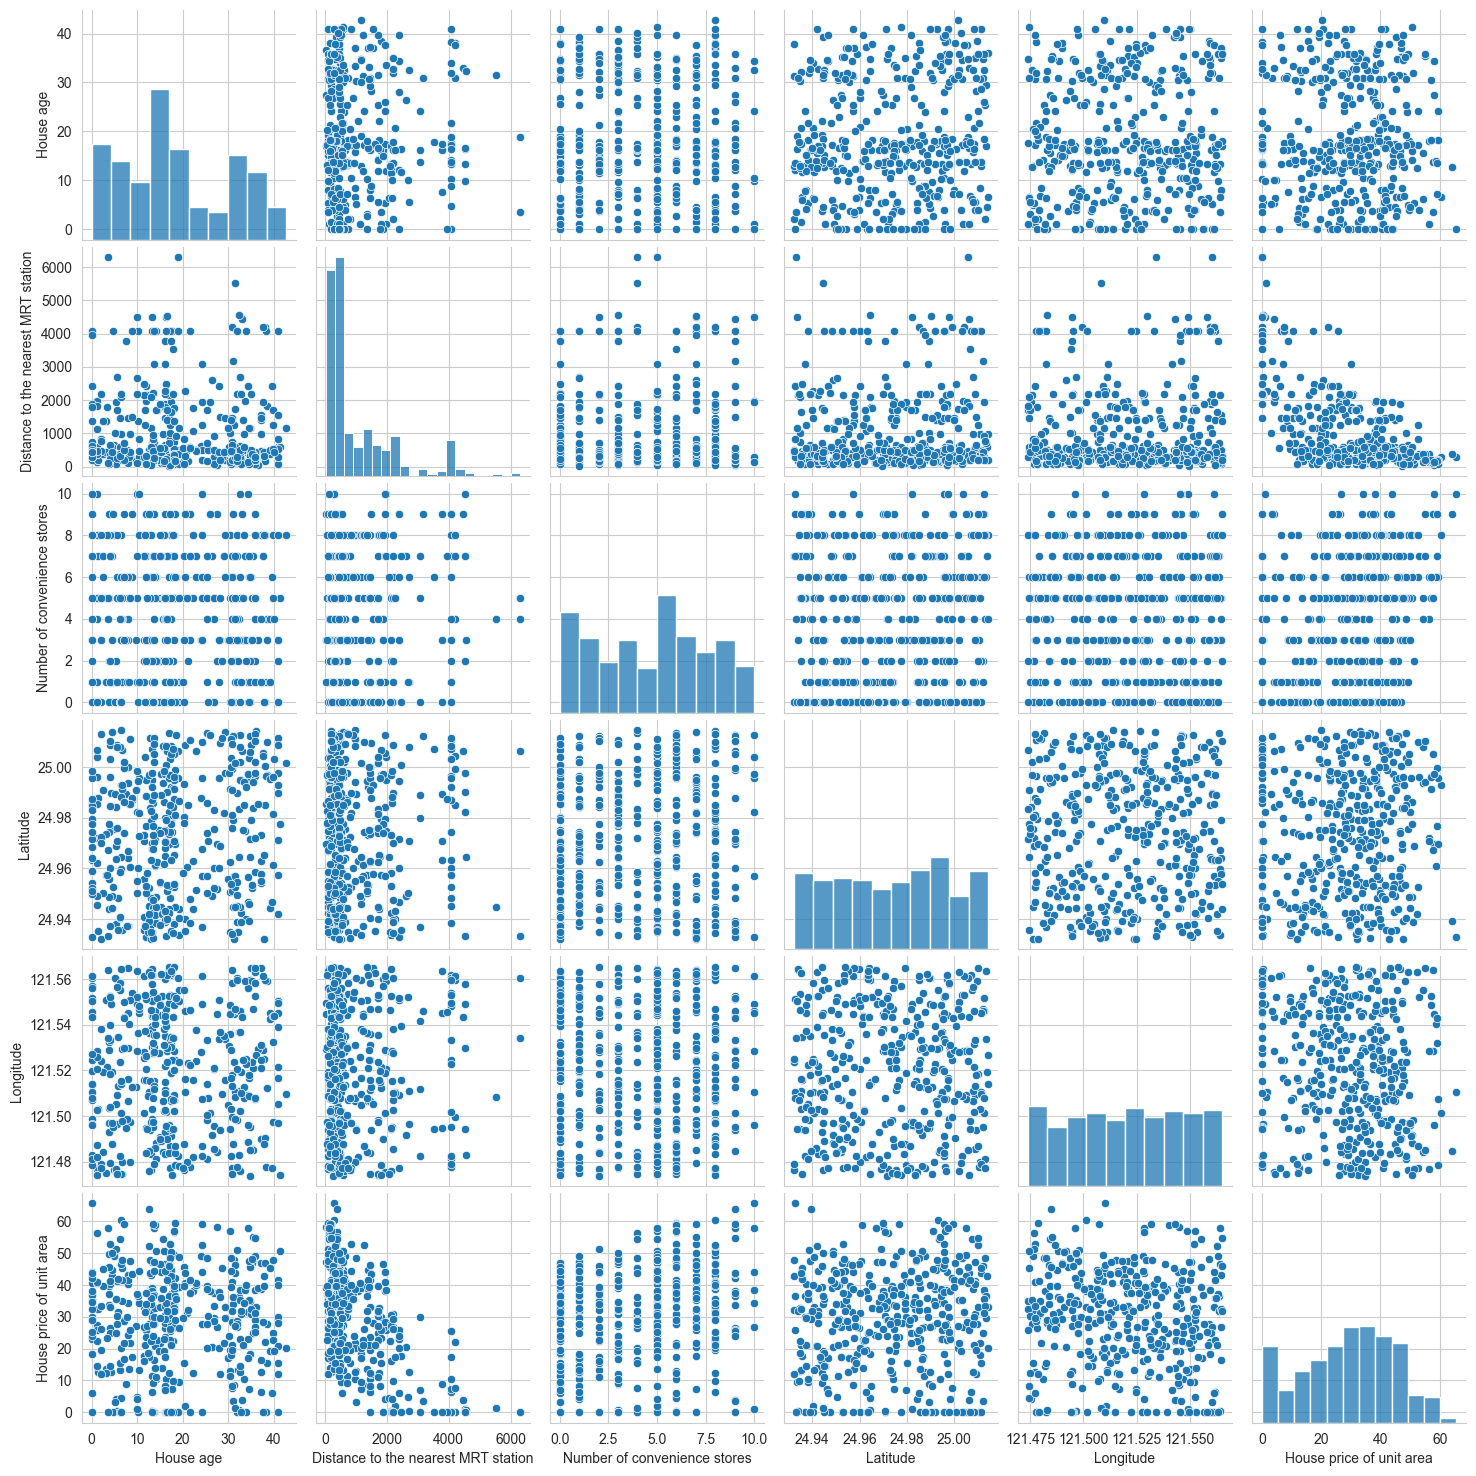

In [17]:
sns.pairplot(df)

#### Corealtion matrix

<Axes: >

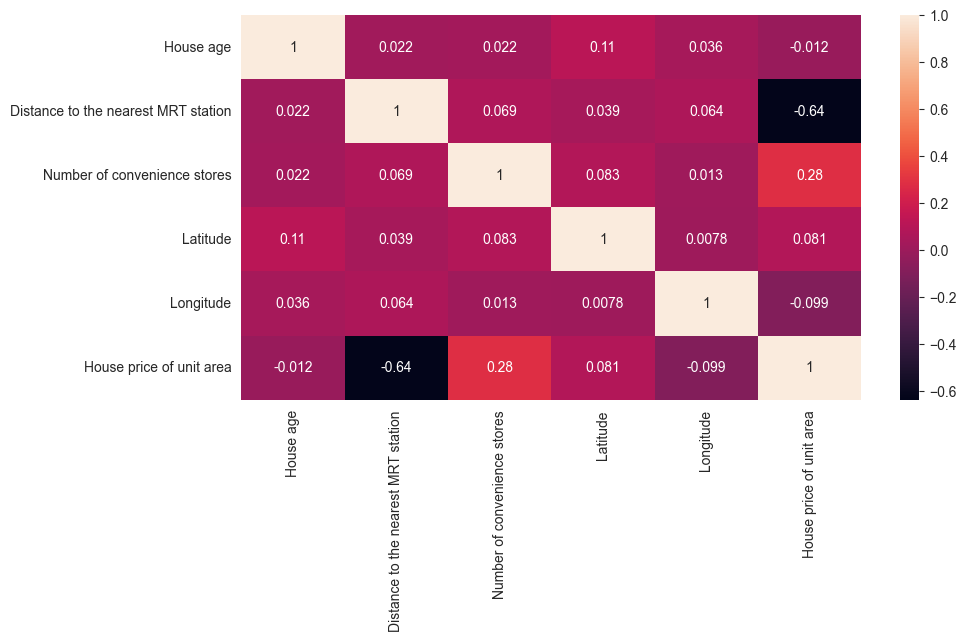

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=['float','int']).corr(),annot=True)

#### Model Creation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [27]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [30]:
X=df[['Distance to the nearest MRT station',
       'Number of convenience stores']]
y=df['House price of unit area']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=43,shuffle=True)

In [32]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred=lr.predict(X_test)
print(f'mse Linear Regression: {mean_squared_error(y_pred,y_test)}')
print((f'r2 score Regression: {r2_score(y_pred,y_test)}'))

mse Linear Regression: 116.90613749720947
r2 score Regression: 0.04532527520885432


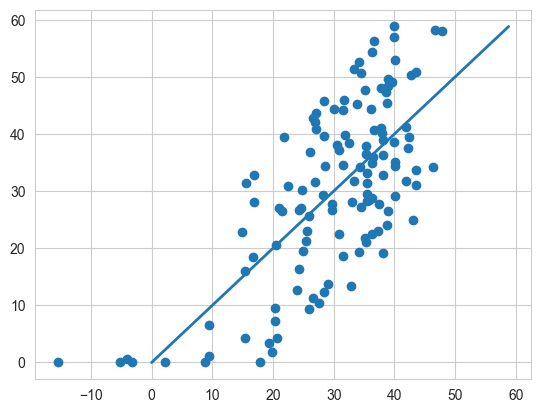

In [41]:
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],lw=2)

In [46]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(f'mean square error in random forest: {mean_squared_error(y_pred_rf,y_test)}')
print(f'r2 score in random forest: {r2_score(y_pred_rf,y_test)}')

mean square error in random forest: 142.33560331346246
r2 score in random forest: 0.11758079739624072


In [42]:
import pickle

In [48]:
with open('RealStatePrice.pkl','wb') as f:
    pickle.dump(lr,f)

##### Creating a streamlit app for model

2024-03-08 20:29:31.407 
  command:

    streamlit run C:\Users\ankit\.conda\envs\tfod\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
